Hãy sử dụng các tập dữ liệu sau và tiến hành phân tích ANOVA 1 chiều

- [Excavation Depth and Archaeology](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan01.html)
- [Apple Orchard Experiment](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan02.html)
- [Red Dye Number 40](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan03.html)
- [Business Startup Costs](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan04.html)
- [Weights of Football Players](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan05.html)

QUY TRÌNH PHÂN TÍCH ANOVA MỘT CHIỀU

Kiểm tra các giả định:

- Các mẫu độc lập với nhau
- Các mẫu có cùng phương sai
- Các mẫu đều tuân theo phân phối chuẩn

Xây dựng giả thuyết

$$H_{0}: \mu_{0} = \mu_{1} = ... = \mu_{n}$$
$$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$$

Giá trị thống kê F được sử dụng trong việc ra quyết định của phân tích ANOVA một chiều. Công thức tính như sau:

$$F = \frac{MS_{B}}{MS_{W}}$$

với:

- $MS_{B} = \frac{\sum_{k}n_{k}(\overline{\rm x_{k}} - \overline{\rm x})^{2}}{k - 1}$
- $MS_{W} = \frac{\sum_{k}n_{i,k}( x_{i,k} - \overline{\rm x})^{2}}{k - 1}$

Loại bỏ giả thuyết $H_{0}$ khi chỉ số F > chỉ số F-critical (hoặc giá trị p tương ứng < 0.05!!!???)



In [93]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import scipy.stats as stats
#from scipy.stats import f_oneway

#ĐỌc dữ liệu
excel_file = 'owan01.xls'
Du_lieu1 = pd.read_excel(excel_file)

Du_lieu1.drop('X1', axis= 1, inplace= True)
Du_lieu1
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'high']]
low = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'low']]
placebo = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'placebo']]


*** No CODEPAGE record, no encoding_override: will use 'ascii'


Sau đây ta sẽ tiến hành phân tích dữ liệu với một số dữ liệu sau:
Bài 1: Độ sâu Khai quật và Khảo cổ học

Bốn địa điểm khai quật khác nhau tại một khu vực khảo cổ ở New Mexico đã đưa ra những độ sâu sau (cm) cho những khám phá khảo cổ quan trọng.

X1 = độ sâu tại Vị trí I


X2 = độ sâu tại Vị trí II


X3 = độ sâu tại Vị trí III


X4 = độ sâu tại Vị trí IV

In [94]:

X2 = Du_lieu1['X2']
X3 = Du_lieu1['X3']
X4 = Du_lieu1['X4']

In [95]:
class thongke():
    def __init__(self, data):
        self.mean = np.mean(data)
        self.med = np.median(data)
        self.mod = statistics.mode(data)
        self.min = np.min(data)
        self.max = np.max(data)
        self.std = np.std(data)
        self.name = data.name
        self.data = (data - self.mean) /self.std
      
    def hist(self):
        plt.figure()
        ax = sns.distplot(self.data)
        plt.axvline(np.mean(self.data), color="r", linestyle="dashed", linewidth=5)
        _, max_ = plt.ylim()
        plt.text(
            self.data.mean() + self.data.mean() / 10,
            max_ - max_ / 10,
            "Mean: {:.2f}".format(self.mean),
        )
        plt.title(self.name)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show();   
    def qq(self):
        sm.qqplot(self.data, line='45')
        plt.show()
        a = [0.25,0.5,0.75]
        b = self.data.quantile(a)
        c = pd.DataFrame(b,a)
        print(c)
        print('-'*50)
    def shapiro(self):
        print('Kiểm định Shapori:')
        stat, p = stats.shapiro(self.data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn')
        else:
            print('Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu không tuân theo luật phân phối chuẩn')
            print('-'*10)
            print('Do đó không thể chạy kiểm định ANOVA 1 chiều.')
        print('-'*50)
    #def anova(self):
        #print('kiểm định anova:')
        #statistic, p_value = f_oneway(self.name)
        #print('statistic:',statistic, '; p value:',p_value)

        

KIỂM TRA GIẢ ĐỊNH

SỰ ĐỘC LẬP

Giả định này được kiểm tra khi nghiên cứu được thiết kế. Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau, tức là một cá nhân chỉ có thể thuộc về một nhóm. Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). Trong ví dụ này, điều kiện này được đáp ứng.

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$$$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$$



Xây dựng giả thuyết kiểm định Bartlett:

$H_{0}: \text{Phương sai các nhóm tương đồng nhau.}$

$H_{a}: \text{Phương sai các nhóm không tương đồng nhau.}$

In [97]:
# tiếp theo ta sẽ dùng Kiểm định tính thuần nhất của phương sai (homogeneity of variance)
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(X2, X3, X4)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)



Kiểm định Bartlett:
BartlettResult(statistic=1.800618441913396, pvalue=0.4064439593170538)
Phương sai các nhóm  bằng nhau.
--------------------------------------------------


In [98]:
# tiếp đến ta Kiểm định bộ dữ liệu (variable, feature) có tuân theo luận phân phối chuẩn hay không?
# Sử dụng histogram và qq plot để vẽ biểu đồ kiểm tra phân phối chuẩn


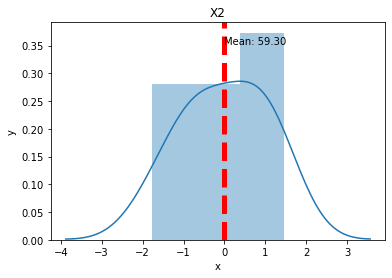

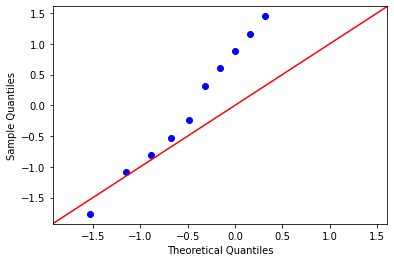

            X2
0.25 -0.735974
0.50  0.039478
0.75  0.814929
--------------------------------------------------


In [99]:

X2 = thongke(X2)
X2.hist()
X2.qq()


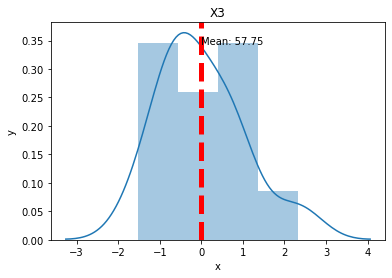

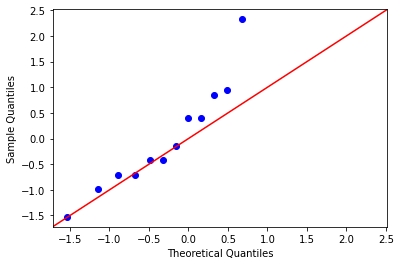

            X3
0.25 -0.702020
0.50 -0.289067
0.75  0.509308
--------------------------------------------------


In [100]:

X3 = thongke(X3)
X3.hist()
X3.qq()

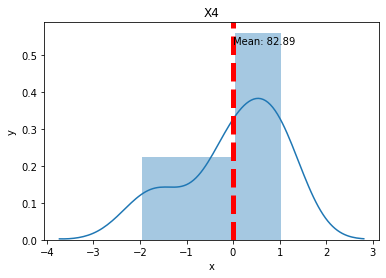

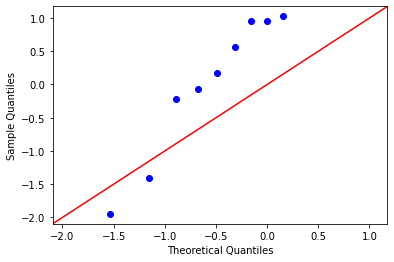

            X4
0.25 -0.226130
0.50  0.165249
0.75  0.948005
--------------------------------------------------


In [101]:

X4 = thongke(X4)
X4.hist()
X4.qq()

Xây dựng giả thuyết kiểm định Shapiro

$H_{0}: \text{Dữ liệu tuân theo phân phối chuẩn.}$

$H_{a}: \text{Dữ liệu không tuân theo phân phối chuẩn.}$


In [102]:
# tiếp đến ta sẽ kiểm tra phân phối chuẩn thông qua các kỹ thuật thống kê (khá chính xác).
# Sử dụng kiểm định Shapiro-Wilk


In [103]:
X2.shapiro()



Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [104]:
X3.shapiro()

Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [105]:
X4.shapiro()

Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


Sau khi kiểm tra các giả định: ta kết luận:

Các mẫu độc lập với nhau
Các mẫu có cùng phương sai
Các mẫu đều tuân theo phân phối chuẩn

Xây dựng giả thuyết kiểm định ANOVA 1 chiều:

$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $

$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$


In [153]:

# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway( Du_lieu1['X2'], Du_lieu1['X3'],Du_lieu1['X4'])
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)


Kiểm định ANOVA 1 chiều:
stat=nan, p=nan
Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.
--------------------------------------------------


Thí nghiệm vườn táo

Năm loại gốc rễ đã được sử dụng trong thí nghiệm ghép vườn táo. Dữ liệu sau đây thể hiện mức tăng trưởng mở rộng (cm) sau bốn năm.


X1 = tăng trưởng mở rộng cho loại I

X2 = tăng trưởng mở rộng cho loại II

X3 = tăng trưởng mở rộng cho loại III

X4 = tăng trưởng mở rộng cho loại IV

X5 = tăng trưởng mở rộng cho loại V

In [108]:
# Tương tự như vậy ta sẽ sử dụng dữ liệu thứ 2
excel_file = 'owan02.xls'
Du_lieu2 = pd.read_excel(excel_file)
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu2['X1'][Du_lieu2['X2'][Du_lieu2['X3'][Du_lieu2['X4'][Du_lieu2['X5'] == 'high']]]]
low = Du_lieu2['X1'][Du_lieu2['X2'][Du_lieu2['X3'][Du_lieu2['X4'][Du_lieu2['X5'] == 'low']]]]
placebo = Du_lieu2['X1'][Du_lieu2['X2'][Du_lieu2['X3'][Du_lieu2['X4'][Du_lieu2['X5'] == 'placebo']]]]


*** No CODEPAGE record, no encoding_override: will use 'ascii'


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


KIỂM TRA GIẢ ĐỊNH

SỰ ĐỘC LẬP

Giả định này được kiểm tra khi nghiên cứu được thiết kế. Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau, tức là một cá nhân chỉ có thể thuộc về một nhóm. Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). Trong ví dụ này, điều kiện này được đáp ứng.

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$$$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$$


In [109]:

X2_1 = Du_lieu2['X1']
X2_2 = Du_lieu2['X2']
X2_3 = Du_lieu2['X3']
X2_4 = Du_lieu2['X4']
X2_5 = Du_lieu2['X5']


Xây dựng giả thuyết kiểm định Bartlett:

$H_{0}: \text{Phương sai các nhóm tương đồng nhau.}$

$H_{a}: \text{Phương sai các nhóm không tương đồng nhau.}$

In [110]:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(X2_1, X2_2, X2_3, X2_4, X2_5)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=1.505379741017298, pvalue=0.825688088344803)
Phương sai các nhóm  bằng nhau.
--------------------------------------------------


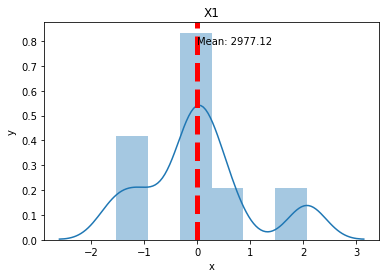

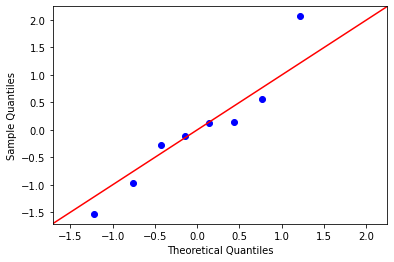

            X1
0.25 -0.444158
0.50  0.000895
0.75  0.246688
--------------------------------------------------


In [111]:
X2_1 = thongke(X2_1)
X2_1.hist()
X2_1.qq()

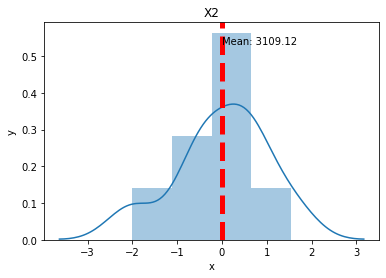

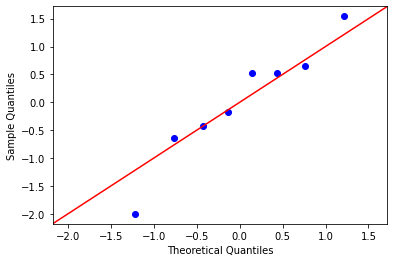

            X2
0.25 -0.483862
0.50  0.172099
0.75  0.561318
--------------------------------------------------


In [112]:
X2_2 = thongke(X2_2)
X2_2.hist()
X2_2.qq()

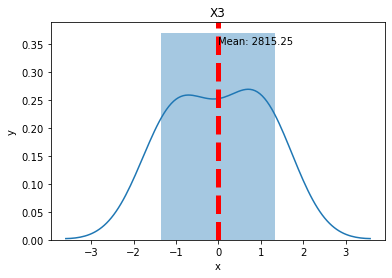

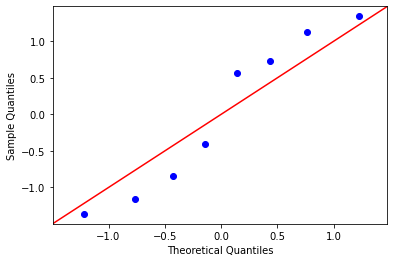

            X3
0.25 -0.922611
0.50  0.078245
0.75  0.833480
--------------------------------------------------


In [113]:
X2_3 = thongke(X2_3)
X2_3.hist()
X2_3.qq()



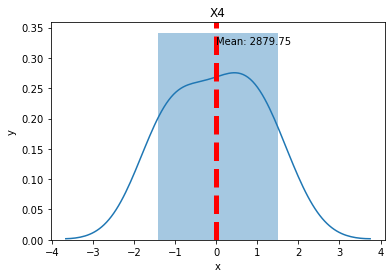

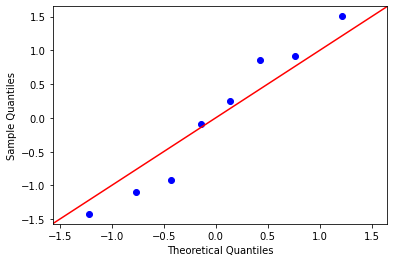

            X4
0.25 -0.966190
0.50  0.082995
0.75  0.872755
--------------------------------------------------


In [114]:
X2_4 = thongke(X2_4)
X2_4.hist()
X2_4.qq()

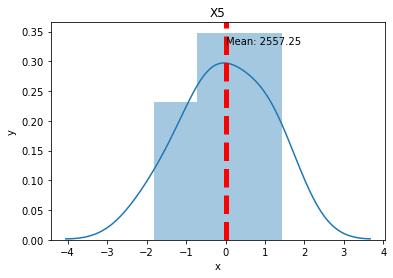

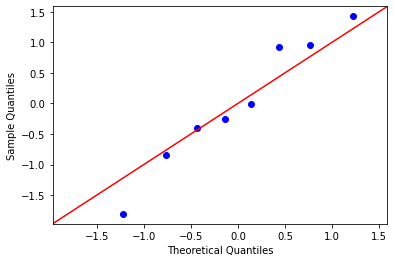

            X5
0.25 -0.511003
0.50 -0.129072
0.75  0.933903
--------------------------------------------------


In [115]:
X2_5 = thongke(X2_5)
X2_5.hist()
X2_5.qq()

In [116]:
X2_1.shapiro()
X2_2.shapiro()
X2_3.shapiro()
X2_4.shapiro()
X2_5.shapiro()

Kiểm định Shapori:
stat=0.943, p=0.645
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=0.954, p=0.747
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=0.905, p=0.317
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=0.939, p=0.599
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=0.959, p=0.803
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


Xây dựng giả thuyết kiểm định ANOVA 1 chiều:

$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $

$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$


In [154]:
# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway( Du_lieu2['X1'], Du_lieu2['X2'], Du_lieu2['X3'],Du_lieu2['X4'], Du_lieu2['X5'])
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=1.31422, p=0.28382584
Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau
--------------------------------------------------


Thuốc nhuộm đỏ Số 40

S.W. Laagakos và F. Mosteller của Đại học Harvard cho chuột ăn các liều thuốc nhuộm đỏ số 40 khác nhau và ghi lại thời gian chết trong nhiều tuần. Kết quả đối với chuột cái, liều lượng và thời gian chết được thể hiện trong dữ liệu

X1 = thời gian chết của nhóm đối chứng

X2 = thời gian chết của nhóm dùng liều thấp

X3 = thời gian chết của nhóm dùng liều trung bình

X4 = thời gian chết của nhóm với liều lượng cao


In [118]:
#tiếp đến ta sử dụng dữ liệu 3
excel_file = 'owan03.xls'
Du_lieu3 = pd.read_excel(excel_file)
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu3['X1'][Du_lieu3['X2'][Du_lieu3['X3'][Du_lieu3['X4'] == 'high']]]
low =  Du_lieu3['X1'][Du_lieu3['X2'][Du_lieu3['X3'][Du_lieu3['X4'] == 'low']]]
placebo =  Du_lieu3['X1'][Du_lieu3['X2'][Du_lieu3['X3'][Du_lieu3['X4']== 'placebo']]]


*** No CODEPAGE record, no encoding_override: will use 'ascii'


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


KIỂM TRA GIẢ ĐỊNH

SỰ ĐỘC LẬP

Giả định này được kiểm tra khi nghiên cứu được thiết kế. Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau, tức là một cá nhân chỉ có thể thuộc về một nhóm. Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). Trong ví dụ này, điều kiện này được đáp ứng.

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$$$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$$


In [121]:

X3_1 = Du_lieu3['X1']
X3_2 = Du_lieu3['X2']
X3_3 = Du_lieu3['X3']
X3_4 = Du_lieu3['X4']



Xây dựng giả thuyết kiểm định Bartlett:

$H_{0}: \text{Phương sai các nhóm tương đồng nhau.}$

$H_{a}: \text{Phương sai các nhóm không tương đồng nhau.}$

In [123]:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(X3_1, X3_2, X3_3, X3_4)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=12.022305190389242, pvalue=0.007307141609688417)
Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova
--------------------------------------------------



Chi phí Khởi sự Kinh doanh

Dữ liệu sau đây trình bày chi phí khởi động kinh doanh (hàng nghìn đô la) cho các cửa hàng.


X1 = chi phí khởi động cho pizza

X2 = chi phí khởi động cho thợ làm bánh / bánh rán

X3 = chi phí khởi động cửa hàng giày

X4 = chi phí khởi động cửa hàng quà tặng

X5 = chi phí khởi động cửa hàng thú cưng

In [125]:
#tiếp đến ta sử dụng dữ liệu 4
excel_file = 'owan04.xls'
Du_lieu4 = pd.read_excel(excel_file)
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu4['X1'][Du_lieu4['X2'][Du_lieu4['X3'][Du_lieu4['X4'][Du_lieu4['X5'] == 'high']]]]
low = Du_lieu4['X1'][Du_lieu4['X2'][Du_lieu4['X3'][Du_lieu4['X4'][Du_lieu4['X5'] == 'low']]]]
placebo = Du_lieu4['X1'][Du_lieu4['X2'][Du_lieu4['X3'][Du_lieu4['X4'][Du_lieu4['X5'] == 'placebo']]]]

*** No CODEPAGE record, no encoding_override: will use 'ascii'


KIỂM TRA GIẢ ĐỊNH

SỰ ĐỘC LẬP

Giả định này được kiểm tra khi nghiên cứu được thiết kế. Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau, tức là một cá nhân chỉ có thể thuộc về một nhóm. Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). Trong ví dụ này, điều kiện này được đáp ứng.

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$$$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$$


In [126]:
X4_1 = Du_lieu4['X1']
X4_2 = Du_lieu4['X2']
X4_3 = Du_lieu4['X3']
X4_4 = Du_lieu4['X4']
X4_5 = Du_lieu4['X5']


Xây dựng giả thuyết kiểm định Bartlett:

$H_{0}: \text{Phương sai các nhóm tương đồng nhau.}$

$H_{a}: \text{Phương sai các nhóm không tương đồng nhau.}$

In [128]:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(X4_1, X4_2, X4_3, X4_4, X4_5)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=2.149120392490446, pvalue=0.7083542065575461)
Phương sai các nhóm  bằng nhau.
--------------------------------------------------


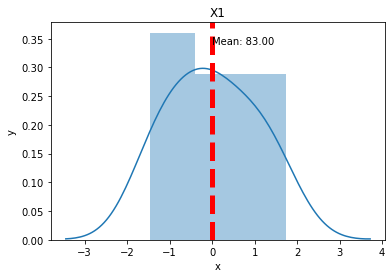

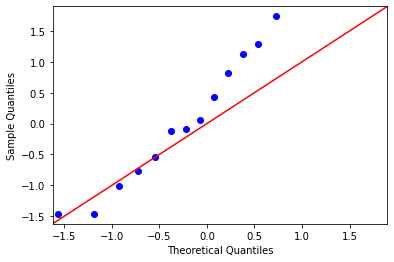

            X1
0.25 -0.762302
0.50 -0.091476
0.75  0.823286
--------------------------------------------------


In [129]:
X4_1 = thongke(X4_1)
X4_1.hist()
X4_1.qq()

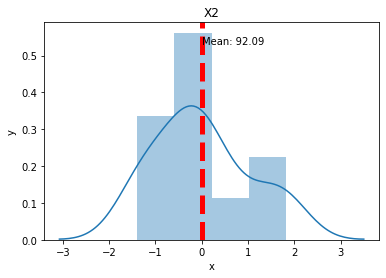

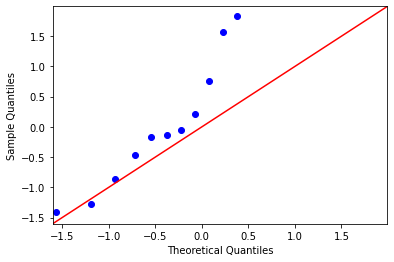

            X2
0.25 -0.663126
0.50 -0.137283
0.75  0.482942
--------------------------------------------------


In [130]:
X4_2 = thongke(X4_2)
X4_2.hist()
X4_2.qq()

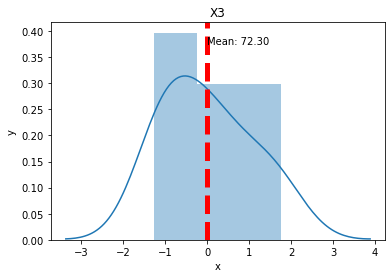

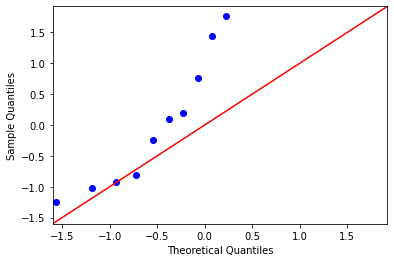

            X3
0.25 -0.892262
0.50 -0.077296
0.75  0.620046
--------------------------------------------------


In [131]:
X4_3= thongke(X4_3)
X4_3.hist()
X4_3.qq()

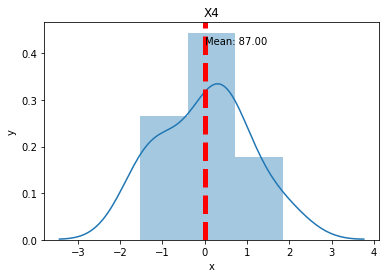

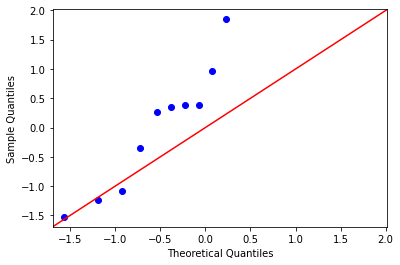

            X4
0.25 -0.902773
0.50  0.308264
0.75  0.381660
--------------------------------------------------


In [132]:
X4_4= thongke(X4_4)
X4_4.hist()
X4_4.qq()

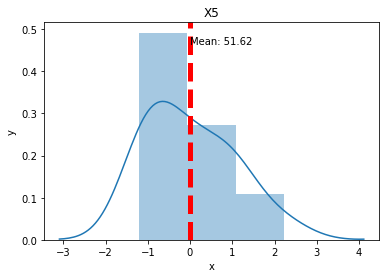

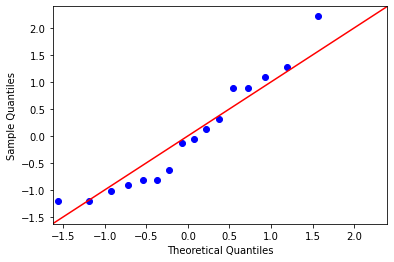

            X5
0.25 -0.843977
0.50 -0.100133
0.75  0.891660
--------------------------------------------------


In [133]:
X4_5= thongke(X4_5)
X4_5.hist()
X4_5.qq()

In [134]:
X4_1.shapiro()
X4_2.shapiro()
X4_3.shapiro()
X4_4.shapiro()
X4_5.shapiro()

Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=0.921, p=0.174
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


Xây dựng giả thuyết kiểm định ANOVA 1 chiều:

$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $

$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$


In [155]:
# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway( Du_lieu4['X1'], Du_lieu4['X2'], Du_lieu4['X3'],Du_lieu4['X4'], Du_lieu4['X5'])
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=nan, p=nan
Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.
--------------------------------------------------


Cân nặng của các cầu thủ bóng đá

Dữ liệu sau đây đại diện cho trọng lượng (pound) của một mẫu ngẫu nhiên các cầu thủ bóng đá chuyên nghiệp của các đội sau đây.


X1 = trọng lượng của người chơi đối với Dallas Cowboys

X2 = trọng lượng của người chơi đối với Green Bay Packers

X3 = trọng lượng của người chơi đối với Denver Broncos

X4 = trọng lượng của người chơi cho Miami Dolphins

X5 = trọng lượng của người chơi cho


In [158]:
#ta tiếp tục sử dụng dữ liệu 5
excel_file = 'owan05.xls'
Du_lieu5 = pd.read_excel(excel_file)
Du_lieu5.drop('X1', axis= 1, inplace= True)
Du_lieu5
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = [Du_lieu5['X2'][Du_lieu5['X3'][Du_lieu5['X4'][Du_lieu5['X5'] == 'high']]]]
low = [Du_lieu5['X2'][Du_lieu5['X3'][Du_lieu5['X4'][Du_lieu5['X5']  == 'low']]]]
placebo =[Du_lieu5['X2'][Du_lieu5['X3'][Du_lieu5['X4'][Du_lieu5['X5']  == 'placebo']]]]


*** No CODEPAGE record, no encoding_override: will use 'ascii'


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


KIỂM TRA GIẢ ĐỊNH

SỰ ĐỘC LẬP

Giả định này được kiểm tra khi nghiên cứu được thiết kế. Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau, tức là một cá nhân chỉ có thể thuộc về một nhóm. Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). Trong ví dụ này, điều kiện này được đáp ứng.

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$$$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$$


In [159]:

X5_2 = Du_lieu5['X2']
X5_3 = Du_lieu5['X3']
X5_4 = Du_lieu5['X4']
X5_5 = Du_lieu5['X5']


Xây dựng giả thuyết kiểm định Bartlett:

$H_{0}: \text{Phương sai các nhóm tương đồng nhau.}$

$H_{a}: \text{Phương sai các nhóm không tương đồng nhau.}$

In [160]:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett( X5_2, X5_3, X5_4, X5_5)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=0.04756469192474709, pvalue=0.9972800736661933)
Phương sai các nhóm  bằng nhau.
--------------------------------------------------


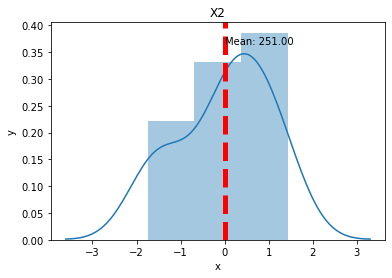

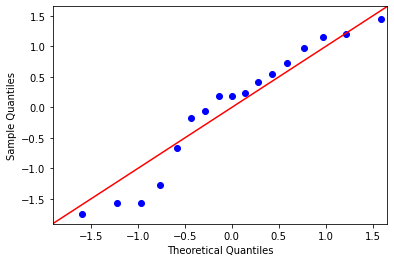

            X2
0.25 -0.663964
0.50  0.181081
0.75  0.724325
--------------------------------------------------


In [161]:
X5_2= thongke(X5_2)
X5_2.hist()
X5_2.qq()

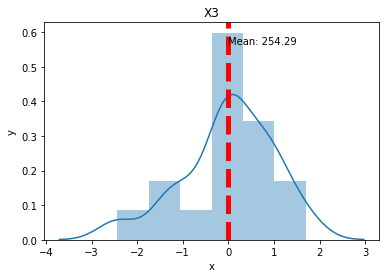

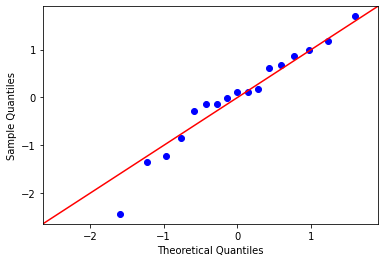

            X3
0.25 -0.272627
0.50  0.108304
0.75  0.679701
--------------------------------------------------


In [162]:
X5_3= thongke(X5_3)
X5_3.hist()
X5_3.qq()

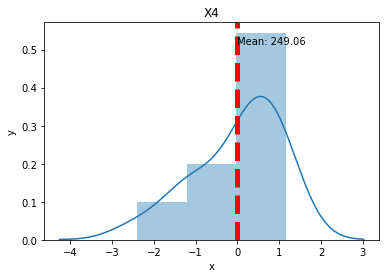

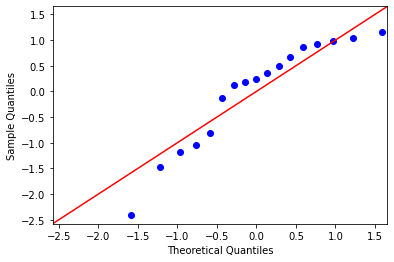

            X4
0.25 -0.802916
0.50  0.242321
0.75  0.857167
--------------------------------------------------


In [163]:
X5_4= thongke(X5_4)
X5_4.hist()
X5_4.qq()

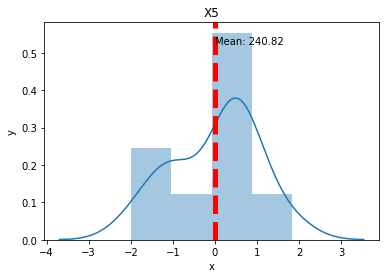

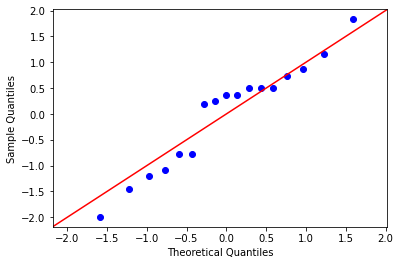

            X5
0.25 -0.778175
0.50  0.374809
0.75  0.496175
--------------------------------------------------


In [164]:
X5_5= thongke(X5_5)
X5_5.hist()
X5_5.qq()

In [165]:

X5_2.shapiro()
X5_3.shapiro()
X5_4.shapiro()
X5_5.shapiro()

Kiểm định Shapori:
stat=0.923, p=0.163
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=0.962, p=0.663
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=0.899, p=0.065
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Shapori:
stat=0.942, p=0.338
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


Xây dựng giả thuyết kiểm định ANOVA 1 chiều:

$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $

$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$


In [166]:
# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway( Du_lieu5['X2'], Du_lieu5['X3'],Du_lieu5['X4'], Du_lieu5['X5'])
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=1.98929, p=0.12444104
Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau
--------------------------------------------------
